# Import Python scripts

In [1]:
import minee
from minee import settings

In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Specify model parameters

In [3]:
models = minee.settings.model.keys()
models = list(models)
select_model = widgets.Dropdown(options=models, description="Select model: ")

Kraskov

In [6]:
# Kraskov = settings.model['Kraskov']['model']
# Kraskov.discrete_features = 'auto'
# Kraskov.n_neighbors = 3
# Kraskov.random_state = None

MINE (direct)

In [7]:
MINE_direct = settings.model['MINE_direct']['model']
MINE_direct.log_freq=int(100)
MINE_direct.avg_freq=int(10) 
MINE_direct.verbose=False
MINE_direct.log=False
MINE_direct.sample_mode='marginal'

MINE via Entropy

In [8]:
MINE_entropy = settings.model['MINE_entropy']['model']
MINE_entropy.log_freq=int(100)
MINE_entropy.avg_freq=int(10) 
MINE_entropy.verbose=False

# Specify data parameters

In [9]:
datasets = settings.data.keys()
datasets = list(datasets)
datasets.append('Self-Defined')
select_data = widgets.Dropdown(options=datasets, description="Select data: ")

In [10]:
#Default value of datasets are shown
#Data can also be user-specified
def generate_dataset(selected_data):
    if (selected_data == 'Mixed Gaussian'):
        dataset = minee.data.mix_gaussian.MixedGaussian(n_samples=400, mean1=0, mean2=0, rho1=0.9, rho2=-0.9, mix=0.5, theta=0)
    elif (selected_data == 'Gaussian'):
        dataset = minee.data.gaussian.Gaussian(n_samples=200, mean1=0, mean2=1, rho=0.5)
    elif (selected_data == 'Mixed Uniform'):
        dataset = minee.data.mix_uniform.MixedUniform(mix=0.5, width_a=10, width_b=10, n_samples=200)
    elif (selected_data == 'Self-Defined'):
        pass
        #define custom dataset, n by 2 matrix with n being number of samples
        #can also define ground truth
        #dataset = 
    return dataset

In [11]:
def plot_data(data, dataname):
    plt.scatter(data[:, 0], data[:, 1])
    plt.title(dataname + ' data')
    plt.show()
    plt.close()

# Specify simulation function

In [12]:
results = dict()

In [13]:
def get_estimation_interactive(data_model, modelname):
    data = data_model.data
    
    mi_estimation = settings.model[modelname]['model'].predict(data)
 
    # Save Results
    return mi_estimation

In [14]:
btn_sim = widgets.Button(description="Run simulation")
out_sim = widgets.Output()
def on_button_clicked(b):
    with out_sim:
        clear_output()
        print("Running simulation for " + select_model.value + "...")
    results[select_model.value] = get_estimation_interactive(dataset, select_model.value)
    with out_sim:
        print("Simulation complete")
btn_sim.on_click(on_button_clicked)

In [15]:
btn_result = widgets.Button(description="Show result")
out_result = widgets.Output()
def showresult(b):
    with out_result:
        clear_output()
        print(results)
btn_result.on_click(showresult)

# Run simulation

### Select data

In [16]:
display(select_data)

Dropdown(description='Select data: ', options=('Gaussian', 'Self-Defined'), value='Gaussian')

In [17]:
dataset = generate_dataset(select_data.value)
X = dataset.data
ground_truth = dataset.ground_truth

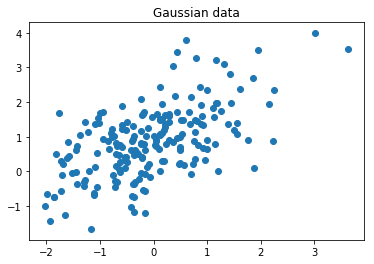

In [18]:
plot_data(X, select_data.value)

In [19]:
# Add ground truth of data to results
results['Ground Truth'] = ground_truth

### Select and run model

In [20]:
display(select_model)

Dropdown(description='Select model: ', options=('MINE_direct_hidden_X_2', 'MINE_multi_task', 'MINE_entropy', '…

In [21]:
display(btn_sim)
display(out_sim)

Button(description='Run simulation', style=ButtonStyle())

Output()

In [22]:
display(btn_result)
display(out_result)

Button(description='Show result', style=ButtonStyle())

Output()